In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [ ]:
#We need to accessing the google drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#Importing our main dataset
working = pd.read_csv("/content/gdrive/MyDrive/analysis/working_2.csv")
#We make sub datasets for analysis
working_numeric = working[['WAGE','satisfied','CPI','numworkers','Completely dissatisfied']]
working_numeric_basic = working[['REAL_WAGE','satisfied']]
#The following datasets are NaN here.
working_numeric['Completely dissatisfied']= working_numeric['Completely dissatisfied'].fillna(4)
working_numeric['satisfied']= working_numeric['satisfied'].fillna(56)

<ipython-input-4-38464d0cbbbe>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_numeric['Completely dissatisfied']= working_numeric['Completely dissatisfied'].fillna(4)
<ipython-input-4-38464d0cbbbe>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_numeric['satisfied']= working_numeric['satisfied'].fillna(56)


In [ ]:
working_numeric

,WAGE,satisfied,CPI,numworkers,Completely dissatisfied
0,11.55,35.0,3.442924,21000.0,3.0
1,11.58,35.0,1.700796,6800.0,3.0
2,11.58,35.0,1.700796,1600.0,3.0
3,11.65,35.0,2.975504,1600.0,3.0
4,11.65,35.0,2.975504,2000.0,3.0
...,...,...,...,...,...
366,32.92,56.0,4.355447,2000.0,4.0
367,27.09,56.0,4.027318,11000.0,4.0
368,33.27,56.0,3.881948,75000.0,4.0
369,33.27,56.0,3.881948,1800.0,4.0


In [ ]:
values = []
#We use the following code to be able to color our map
for ind,row in working.iterrows():
    text = row['title']
    if text == "Manufacturing":
        values.append(1)
    elif text == "Administrative and Support and Waste Management and Remediation Services":
        values.append(7)
    elif text == "Transportation and Warehousing":
        values.append(2)
    elif text == "Retail Trade":
        values.append(3)
    elif text == "Construction":
        values.append(4)
    elif text == "Educational Services":
        values.append(5)
    elif text == "Health Care and Social Assistance":
        values.append(6)
    elif text == "Mining, Quarrying, and Oil and Gas Extraction":
        values.append(8)
    elif text == "Arts, Entertainment, and Recreation":
        values.append(9)

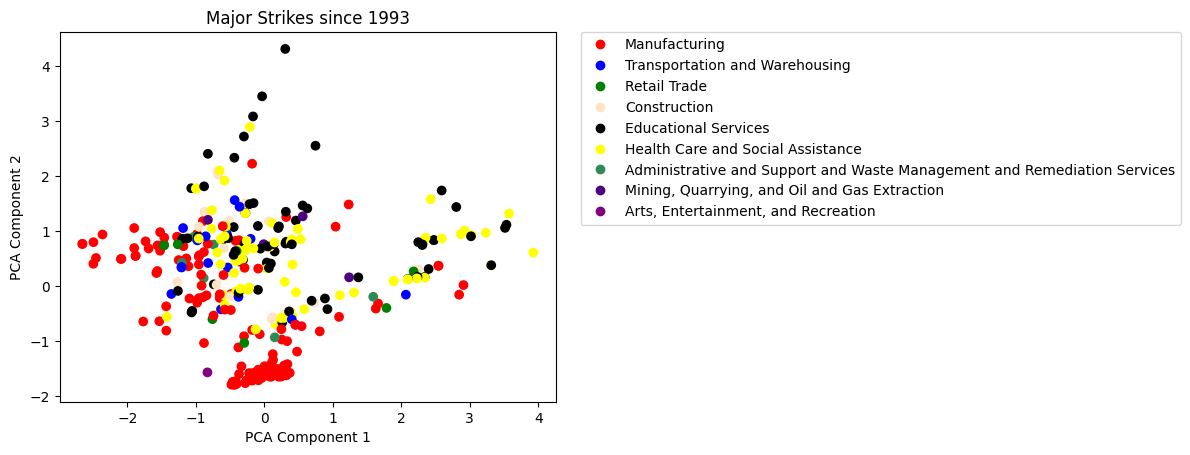

In [ ]:
#We create a color map
colors = ListedColormap(['r','b','g','bisque','brown','black','yellow','seagreen','indigo','purple'])
classes = working['title'].unique()
scaler = StandardScaler()
data = working_numeric
#We scale our data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
#We then do a PCA reduction
pca = PCA(n_components=2)
PCA_reduced = pca.fit_transform(scaled_data)

PCA_df= pd.DataFrame(PCA_reduced, columns=['PC1', 'PC2'])
#scatter = plt.scatter(x = PCA_df['PC1'].tolist(), y = PCA_df['PC2'].tolist())

# K-Means clustering
kmeans = KMeans(n_clusters=9, init = 'k-means++', random_state=0, n_init=19).fit(data)
kmeans_labels =  kmeans.fit_predict(data)

# Assigning the cluster labels back to the DataFrame
PCA_df['KMeans_Labels'] = kmeans_labels


scatter2 = plt.scatter(x = PCA_df['PC1'].tolist(), y = PCA_df['PC2'].tolist(),c=values,cmap=colors)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.title('Major Strikes since 1993')
plt.legend(handles=scatter2.legend_elements()[0], labels=list(classes),bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

Text(0.5, 1.0, 'Major Strikes since 1993')

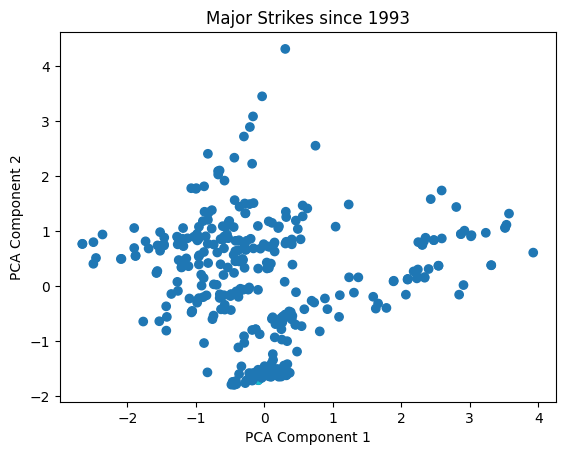

In [ ]:
cluster_numbers = range(2, 59)
#We run the following program to get the optimal kmeans score.
ch_scores_kmeans = []
for n_clus in cluster_numbers:

    kmeans = KMeans(n_clusters=n_clus, init = 'k-means++', random_state=0, n_init=1).fit(data)
    kmeans_labels = kmeans.labels_

    ch_score_kmeans = calinski_harabasz_score(data, kmeans_labels)

    ch_scores_kmeans.append(ch_score_kmeans)

optimal_n_clusters_kmeans = cluster_numbers[ch_scores_kmeans.index(max(ch_scores_kmeans))]
print(optimal_n_clusters_kmeans)

58


In [ ]:

#We get the CH score for our optimal clustering
print(calinski_harabasz_score(data,values))

1.6037236634108312


Text(0.5, 1.0, 'Major Strikes since 1993 (KMeans)')

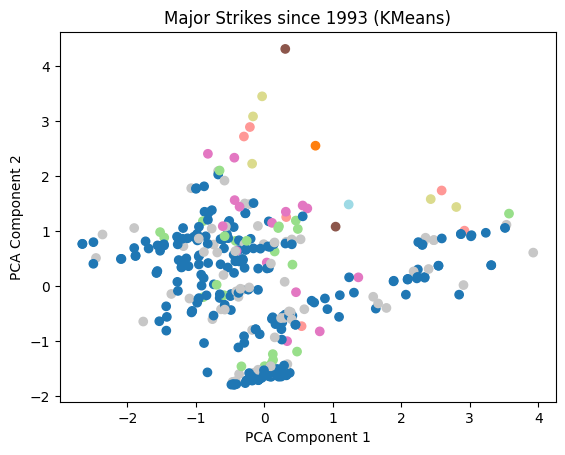

In [ ]:
scatter = plt.scatter(x = PCA_df['PC1'].tolist(), y = PCA_df['PC2'].tolist(),c = kmeans_labels, cmap='tab20')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.title('Major Strikes since 1993 (KMeans)')

In [ ]:
date = [(j + i/10000) for i in range (1993,2024) for j in range (1,13)]
date = np.array(date).reshape(-1,1)
month_df = pd.DataFrame(date)
#We create a new data frame and create new rows.
#We create columns where we count the number of strikes in each industry in each month from 1993 to now
manu = [0 for i in range(0, 372)]
trans = [0 for i in range(0, 372)]
health = [0 for i in range(0, 372)]
retail = [0 for i in range(0, 372)]
cons = [0 for i in range(0, 372)]
admin = [0 for i in range(0, 372)]
edu = [0 for i in range(0, 372)]
mining = [0 for i in range(0, 372)]
arts = [0 for i in range(0, 372)]
month = [0 for i in range(0, 372)]
year = [0 for i in range(0, 372)]
sum = [0 for i in range(0, 372)]
date2 = []
#We then assign new columns to actual columns
month_df.columns = ['date']
month_df['Manufacturing'] = manu
month_df['Transportation and Warehousing'] = trans
month_df['Health Care and Social Assistance'] = health
month_df['Retail Trade'] = retail
month_df['Construction'] = cons
##month_df['Administrative and Support and Waste Management and Remediation Services'] = admin
month_df['Mining'] = mining
#month_df['Arts, Entertainment, and Recreation'] = arts
month_df['Educational Services'] = edu
month_df['Month'] = month
month_df['Year'] = year
for ind_i,row_i in month_df.iterrows():
  for ind_j,row_j in working.iterrows():
    if np.abs(row_i['date'] - row_j['DATE']) < 0.0000001:
      title = str(row_j['title'])
      if title == 'Manufacturing':
        month_df.loc[ind_i,'Manufacturing'] += 1
      elif title == 'Transportation and Warehousing':
        month_df.loc[ind_i,'Transportation and Warehousing'] += 1
      elif title == 'Retail Trade':
        month_df.loc[ind_i,'Retail Trade'] += 1
      elif title == 'Construction':
        month_df.loc[ind_i,'Construction'] += 1
      #elif title == 'Administrative and Support and Waste Management and Remediation Services':
        #month_df.loc[ind_i,'Administrative and Support and Waste Management and Remediation Services'] += 1
      elif title == 'Health Care and Social Assistance':
        month_df.loc[ind_i,'Health Care and Social Assistance'] += 1
      elif title == 'Mining':
        month_df.loc[ind_i,'Mining'] += 1
      #elif title == 'Arts, Entertainment, and Recreation':
        #month_df.loc[ind_i,'Arts, Entertainment, and Recreation'] += 1
      elif title == 'Educational Services':
        month_df.loc[ind_i,'Educational Services'] += 1
  month_df.loc[ind_i,'Month'] = np.floor(row_i['date'])
  month_df.loc[ind_i,'Year'] = np.rint((row_i['date'] - np.floor(row_i['date']))*10000)
  date_time = str(datetime.strptime(str(int(np.rint((row_i['date'] - np.floor(row_i['date']))*10000)))+ "-" + str(int(np.floor(row_i['date']))) + "-1","%Y-%m-%d"))
  date2.append(date_time.split()[0])
month_df['date'] = date2

In [ ]:
month_df_2 = month_df[month_df['Year'] >= 2006]

In [ ]:
#We input dataframes for industry average hourly wages
cons_wage = pd.read_csv("/content/gdrive/MyDrive/analysis/industry_wages/avg_hourly_construction.csv")
cons_wage = cons_wage.rename(columns={'DATE': 'date', 'CES2000000003': 'construction_wage'})
manu_wage = pd.read_csv("/content/gdrive/MyDrive/analysis/industry_wages/avg_hourly_manufacturing.csv")
manu_wage = manu_wage.rename(columns={'DATE': 'date', 'CES3000000008': 'manufacturing_wage'})
mining_wage = pd.read_csv("/content/gdrive/MyDrive/analysis/industry_wages/avg_hourly_mining_logging_1943.csv")
mining_wage = mining_wage.rename(columns={'DATE': 'date', 'CES1000000008': 'mining_wage'})
edu_wage = pd.read_csv("/content/gdrive/MyDrive/analysis/industry_wages/avg_hourly_private_edu_and_health.csv")
edu_wage = edu_wage.rename(columns={'DATE': 'date', 'CES6500000003': 'edu_wage'})
retail_wage = pd.read_csv("/content/gdrive/MyDrive/analysis/industry_wages/avg_hourly_retail_trade.csv")
retail_wage = retail_wage.rename(columns={'DATE': 'date', 'CES4200000003': 'retail_wage'})
trans_wage = pd.read_csv("/content/gdrive/MyDrive/analysis/industry_wages/avg_hourly_transportation_and_warehousing.csv")
trans_wage = trans_wage.rename(columns={'DATE': 'date', 'CES4300000003': 'trans_wage'})
cpi = pd.read_csv("/content/gdrive/MyDrive/analysis/Median_CPI.csv")
cpi = cpi.rename(columns={'DATE': 'date', 'MEDCPIM158SFRBCLE': 'Median_CPI'})
satisfaction = pd.read_csv("/content/gdrive/MyDrive/analysis/Job_Satisfaction.csv")
satisfaction.columns = satisfaction.iloc[0]
satisfaction.columns = satisfaction.columns.fillna('Year')

In [ ]:
sum = []
#We create an average wage column
for ind,row in month_df.iterrows():
  sum.append(row['Manufacturing'] + row['Transportation and Warehousing'] +
  row['Retail Trade'] + row['Construction'] + #row['Administrative and Support and Waste Management and Remediation Services']
  + row['Health Care and Social Assistance'] +
  row['Mining'] + #row['Arts, Entertainment, and Recreation'] +
  row['Educational Services']+
  row['Educational Services'] )
month_df['total_strikes'] = sum

In [ ]:
#We do an inner join to keep only the columns that have date information for both people
merged_df = month_df.merge(cons_wage, on='date')
merged_df = merged_df.merge(manu_wage, on='date')
merged_df = merged_df.merge(trans_wage, on='date')
merged_df = merged_df.merge(mining_wage, on='date')
merged_df = merged_df.merge(edu_wage, on='date')
merged_df = merged_df.merge(retail_wage, on='date')
merged_df = merged_df.merge(cpi, on='date')
merged_df = merged_df.merge(satisfaction,on = 'Year')

In [ ]:
#We then create new real wage columns (calculated by wage/(1 + CPI))
merged_df['construction_real_wage'] = merged_df.apply(lambda row: (row['construction_wage']/(1 + row['Median_CPI'])), axis=1)
merged_df['manufacturing_real_wage'] = merged_df.apply(lambda row: (row['manufacturing_wage']/(1 + row['Median_CPI'])), axis=1)
merged_df['trans_real_wage'] = merged_df.apply(lambda row: (row['trans_wage']/(1 + row['Median_CPI'])), axis=1)
merged_df['mining_real_wage'] = merged_df.apply(lambda row: (row['mining_wage']/(1 + row['Median_CPI'])), axis=1)
merged_df['edu_real_wage'] = merged_df.apply(lambda row: (row['edu_wage']/(1 + row['Median_CPI'])), axis=1)
merged_df['retail_real_wage'] = merged_df.apply(lambda row: (row['retail_wage']/(1 + row['Median_CPI'])), axis=1)
merged_df['average_wage'] = (merged_df['construction_wage'] + merged_df['manufacturing_wage'] + merged_df['retail_wage'] +
merged_df['trans_wage'] +
merged_df['mining_wage'] +
merged_df['edu_wage'])/6

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  est = KMeans(
<ipython-input-19-de8c525e30e4>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['KMeans_Labels'] = kmeans_labels
<ipython-input-19-de8c525e30e4>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

Text(0.5, 1.0, 'Average Job Conditions Month to Month from 2006 (Spectral)')

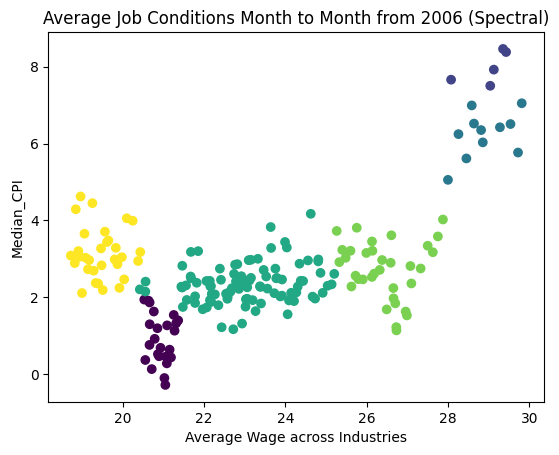

In [ ]:
data2 = merged_df[['average_wage','Median_CPI']]

#'Somewhat satisfied','Somewhat dissatisfied',
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data2)

#pca = PCA(n_components=2)
#PCA_reduced = pca.fit_transform(scaled_data)

#PCA_df_2= pd.DataFrame(PCA_reduced, columns=['PC1', 'PC2'])

# K-Means clustering
kmeans = KMeans(n_clusters=5, init = 'k-means++', random_state=0, n_init=19).fit(data)
kmeans_labels =  kmeans.fit_predict(data2)

# Spectral Clustering
spec = SpectralClustering(n_clusters=6, random_state=0, n_init=19).fit(data)
spec_labels =  spec.fit_predict(data2)

#Assigning the cluster labels back to the DataFrame
data2['KMeans_Labels'] = kmeans_labels
data2['Spectral_Labels'] = spec_labels

scatter = plt.scatter(x = data2['average_wage'].tolist(), y = data2['Median_CPI'].tolist(),c = spec_labels, cmap='viridis')
plt.xlabel('Average Wage across Industries')
plt.ylabel('Median_CPI')

plt.title('Average Job Conditions Month to Month from 2006 (Spectral)')

Text(0.5, 1.0, 'Average Job Conditions Month to Month from 2006 (KMeans)')

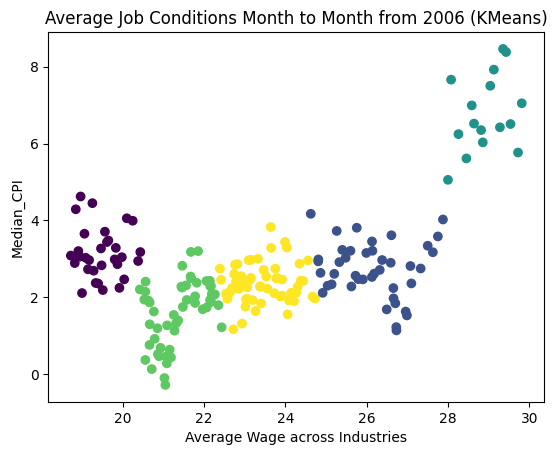

In [ ]:
scatter = plt.scatter(x = data2['average_wage'].tolist(), y = data2['Median_CPI'].tolist(),c = kmeans_labels, cmap='viridis')
plt.xlabel('Average Wage across Industries')
plt.ylabel('Median_CPI')

plt.title('Average Job Conditions Month to Month from 2006 (KMeans)')

Text(0.5, 1.0, 'Average Job Conditions Month to Month from 2006 (Strikes)')

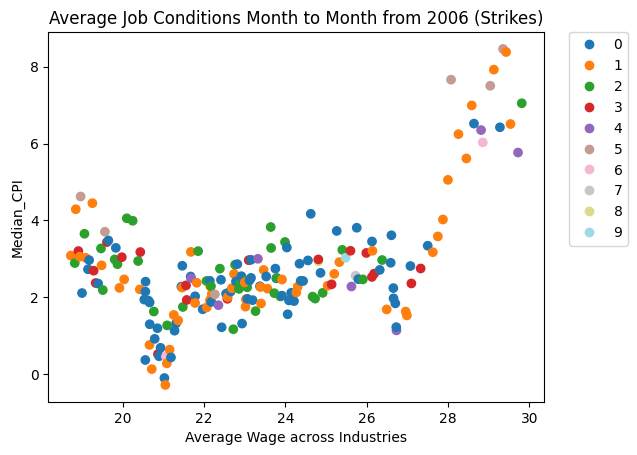

In [ ]:
scatter3 = plt.scatter(x = data2['average_wage'].tolist(), y = data2['Median_CPI'].tolist(),c = merged_df['total_strikes'], cmap='tab20')
plt.xlabel('Average Wage across Industries')
plt.ylabel('Median_CPI')
plt.legend(handles=scatter3.legend_elements()[0], labels=[0,1,2,3,4,5,6,7,8,9],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Average Job Conditions Month to Month from 2006 (Strikes)')

In [ ]:
from collections import Counter
Counter(merged_df['total_strikes'])

Counter({1: 55, 2: 36, 3: 19, 5: 6, 0: 74, 6: 2, 4: 7, 8: 1, 9: 1, 7: 1})

In [ ]:
cluster_numbers = range(2, 21)
#Similar program to find optimal clustering
ch_scores_kmeans = []
ch_scores_spectral = []
for n_clus in cluster_numbers:

    kmeans = KMeans(n_clusters=n_clus, init = 'k-means++', random_state=0, n_init=10).fit(data2)
    kmeans_labels = kmeans.labels_

    spec = SpectralClustering(n_clusters=n_clus, random_state=0, n_init=10).fit(data2)
    spec_labels = spec.labels_

    ch_score_kmeans = calinski_harabasz_score(data2, kmeans_labels)
    ch_score_spectral = calinski_harabasz_score(data2, spec_labels)

    ch_scores_kmeans.append(ch_score_kmeans)
    ch_scores_spectral.append(ch_score_spectral)

optimal_n_clusters_kmeans = cluster_numbers[ch_scores_kmeans.index(max(ch_scores_kmeans))]
optimal_n_clusters_spectral = cluster_numbers[ch_scores_spectral.index(max(ch_scores_spectral))]
print(optimal_n_clusters_kmeans, optimal_n_clusters_spectral)

15 7


In [ ]:
merged_df.to_csv("/content/gdrive/MyDrive/analysis/clustering.csv")

In [ ]:
    kmeans = KMeans(n_clusters=15, init = 'k-means++', random_state=0, n_init=10).fit(data2)
    kmeans_labels = kmeans.labels_

    spec = SpectralClustering(n_clusters=7, random_state=0, n_init=10).fit(data2)
    spec_labels = spec.labels_

    print(calinski_harabasz_score(data2, kmeans_labels))
    print(calinski_harabasz_score(data2, spec_labels))
    print(calinski_harabasz_score(data2, merged_df['total_strikes']))

647.7746459119013
587.1605550224301
1.7881578824025453


,date,Manufacturing,Transportation and Warehousing,Health Care and Social Assistance,Retail Trade,Construction,Mining,Educational Services,Month,Year,...,trans_wage,mining_wage,edu_wage,retail_wage,Median_CPI,Completely satisfied,Somewhat satisfied,Somewhat dissatisfied,Completely dissatisfied,No opinion
0,2006-03-01,1,0,0,0,0,0,0,3,2006,...,19.04,19.47,20.02,15.24,3.082183,43,47,8,2,0.5
1,2006-04-01,0,1,0,1,0,0,0,4,2006,...,19.13,19.66,20.09,15.24,2.887032,43,47,8,2,0.5
2,2006-05-01,0,0,0,0,1,0,0,5,2006,...,19.19,19.77,20.13,15.17,4.288161,43,47,8,2,0.5
3,2006-06-01,0,0,0,0,3,0,0,6,2006,...,19.20,19.83,20.19,15.23,3.199831,43,47,8,2,0.5
4,2006-07-01,0,0,0,0,1,0,0,7,2006,...,19.24,19.87,20.25,15.20,3.053931,43,47,8,2,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,2022-08-01,0,0,1,0,0,0,2,8,2022,...,27.92,32.96,32.13,23.05,8.463917,49,39,8,4,0.5
198,2022-09-01,0,0,1,0,0,0,0,9,2022,...,28.12,32.92,32.11,23.11,8.382964,49,39,8,4,0.5
199,2022-10-01,0,0,1,0,0,0,0,10,2022,...,28.14,32.94,32.30,23.21,6.507748,49,39,8,4,0.5
200,2022-11-01,0,0,0,0,0,0,2,11,2022,...,28.11,33.26,32.47,23.46,5.765770,49,39,8,4,0.5
